E2. 손글씨 데이터, 와인 데이터, 유방암 데이터 분류기
===
---

![sk](https://user-images.githubusercontent.com/70703320/103968690-a2f0a400-51a7-11eb-815a-74419958ffed.png)

이번 노드에서는 **sklearn에 관한 데이터로 분류기**를 만들어 보았다.
sklearn 데이터는 크게 Toy datasets 과 Real World datasets 으로 나뉘는데
그 중 **Toy datasets 에서 Target이 categorical predict로 분류가 가능한 데이터셋**들인

- 1. Optical recognition of handwritten digits dataset (손글씨 데이터)
- 2. Wine recognition dataset (와인 데이터)
- 3. Breast cancer wisconsin (diagnostic) dataset (유방암세포 데이터)

<br/>

**변수에 관한 설명들**은 [이곳](https://biology-statistics-programming.tistory.com/24)
에 적어두었다. 

이상 세 가지 데이터셋을 분류해보자

---

## 1. 손글씨 데이터 (load_digits)

### 1-1. 필요한 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

### 1-2. 데이터 준비

In [2]:
digits = load_digits()

### 1-3. 데이터 이해하기

##### 1) Feature Data 지정하기 - digits에서 data(feature) 정보를 digits_data에 입력

In [3]:
digits_data = digits.data 

##### 2) Label Data 지정하기 - digits에서 target(label) 정보를 digits_label에 입력

In [4]:
digits_label = digits.target 

##### 3) Target Names 출력해보기

In [5]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


##### 4) 데이터 Describe 해보기

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

##### 5) Target class의 각 빈도 구해보기

In [7]:
print(Counter(digits_label))

Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})


거의 **모든 클래스가 같은 비율**이라고 볼 수 있다!

##### 6) 이미지 확인

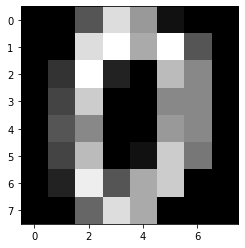

In [8]:
image = digits_data[0].reshape(8,8)
plt.imshow(image, cmap='gray')
plt.show()

### 1-4. Train, Test 데이터 분리

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, # digits_data의 비율을 80%, digits_label의 비율을 20%로 나눔
                                                    random_state=7) # random하게 섞어줌

### 1-5. 다양한 모델로 학습시켜보기

##### 1) Decision Tree

In [10]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



##### 2) RandomForest

In [11]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



##### 3) SVM

In [12]:
svm_model = svm.SVC(random_state=32)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



##### 4) SGD

In [13]:
sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train,y_train)
y_pred= sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



##### 5) LogisticClassifier

In [14]:
logistic_model = LogisticRegression(random_state=32, solver = 'lbfgs', max_iter=1500) # digits_data와 같이 데이터의 값이 0~16 정도일때는 solver, max_iter의 값을 주어 해결
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.84      0.88        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



### 1-6. 모델을 평가해보기

##### 1) 모델의 성능을 평가하는 지표로 좋은 것
- **Accuracy**

<br/>

##### 2) 선택한 이유
- 숫자 분류 모델은 양성을 음성으로 잘못 분류할 때와 음성을 양성으로 잘못 분류할 때의 치명도는 크게 차이나지 않는다. 즉, **클래스 별 중요도가 모두 동등하게 중요**하다.
- 또한, **0~9까지의 숫자 비율이 거의 다 비슷(1:1:1:1:1:1:1:1:1, 1-5 참조)하다.**
- 따라서, **얼마나 많은 숫자를 얼마나 많이 정확하게 분류하였는가**가 더 중요하다. 
- 즉, **정확도가 가장 중요**하다.

<br/>

##### 3)내가 선택한 최고의 모델
- **SVM 모델**

<br/>

##### 4) 모델을 선택한 이유
- **Accuracy 뿐 아니라 Precision, Recall 값도 가장 크기 때문**

<br/>

---

## 2. 와인 데이터 (load_wine)

<br/>

### 2-1. 필요한 모듈 import

In [15]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

### 2-2. 데이터  준비

In [16]:
wine = load_wine()

### 2-3. 데이터 이해하기

##### 1) Feature Data 지정하기 - wine의 data정보를 정규화하여 wine_data에 입력

In [17]:
scaler = MinMaxScaler()
wine_data = wine.data 
wine_data = scaler.fit_transform(wine_data[:])


##### 2) Label Data 지정하기 - wine에서 target(label) 정보를 wine_label에 입력

In [18]:
wine_label = wine.target

##### 3) Target Names 출력해보기

In [19]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


##### 4) 데이터 Describe 해보기

In [20]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

##### 5) Target class의 각 비율 확인

In [21]:
print(Counter(wine_label))

Counter({1: 71, 0: 59, 2: 48})


약 **Class_0:Class_1:Class_2 = 6:7:5** 정도로 **비교적 고르게 분포**하였다고 할 수 있다.


### 2-4. train, test 데이터 분리

In [22]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, # wine_data의 비율을 80%, wine_label의 비율을 20%로 나눔
                                                    random_state=7) # random하게 섞어줌

### 2-5. 다양한 모델로 학습시켜보기

##### 1) DecisionTree

In [23]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



##### 2) RandomForest

In [24]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



##### 3) SVM

In [25]:
svm_model = svm.SVC(random_state=32)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



##### 4) SGD

In [26]:
sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train,y_train)
y_pred= sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



##### 5) LogisticClassifier

In [27]:
logistic_model = LogisticRegression(random_state=32)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 2-6. 모델을 평가해보기

모델의 성능을 평가하는 지표로 좋은 것
- **Accuracy**

<br/>

선택한 이유
- 와인 분류 모델은 양성을 음성으로 잘못 분류할 때와 음성을 양성으로 잘못 분류할 때의 치명도는 크게 차이나지 않는다. 즉, **클래스 별 중요도가 모두 동등하게 중요**하다.
- 또한, **세 가지의 와인 비율이 거의 다 비슷(6:7:5 정도임, 1-5 참조)하다.**
- 따라서, **얼마나 많은 숫자를 얼마나 많이 정확하게 분류하였는가**가 더 중요하다. 
- 즉, **정확도가 가장 중요**하다.

<br/>

내가 선택한 최고의 모델
- **RandomForest 모델, SVM 모델, Logistic Classifier 모델**

<br/>

모델을 선택한 이유
- **Accuracy 뿐 아니라 Precision, Recall 값도 가장 크기 때문**

<br/>
<br/>

---

## 3. 유방암 데이터 (load_breast_cancer)

<br/>

### 3-1. 필요한 모듈 import

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter

### 3-2.  데이터 준비 

In [29]:
breast_cancer = load_breast_cancer()

### 3-3. 데이터 이해하기

##### 1) Feature Data 지정하기 - breast_cancer의 data정보를 정규화하여 breast_cancer_data에 입력

In [30]:
scaler = MinMaxScaler()
breast_cancer_data = breast_cancer.data 
breast_cancer_data = scaler.fit_transform(breast_cancer_data[:]) 

##### 2) Label Data 지정하기 - breast_cancer에서 target(label) 정보를 breast_cancer_label에 입력


In [31]:
breast_cancer_label = breast_cancer.target 

##### 3) Target Names 출력해보기

In [32]:
print(breast_cancer.target_names)

['malignant' 'benign']


##### 4) 데이터 Describe 해보기

In [33]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

##### 5) Target class의 각 비율 확인

In [34]:
print(Counter(breast_cancer_label))

Counter({1: 357, 0: 212})


**양성(1)과 악성(0)의 비율이 357:212**로 비교적 **비율의 차이가 존재**한다!



### 3-4. train, test 데이터 분리

In [35]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, # breast_cancer_data의 비율을 80%, breast_cancer_label의 비율을 
                                                    breast_cancer_label, # random하게 섞어줌
                                                    test_size=0.2,
                                                    random_state=7)

### 3-5. 다양한 모델로 학습시켜보기

##### 1) DecisionTree

In [36]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



##### 2) RandomForest

In [37]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



##### 3) SVM

In [38]:
svm_model = svm.SVC(random_state=32)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



##### 4) SGD

In [39]:
sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train,y_train)
y_pred= sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



##### 5) LogisticClassifier

In [40]:
logistic_model = LogisticRegression(random_state=32, solver = 'lbfgs', max_iter=1500)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.94      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### 3-6. 모델을 평가해보기

모델의 성능을 평가하는 지표로 좋은 것
- **Recall**

<br/>

선택한 이유
- 우선 target class의 비율이 불균형하다. **양성과 음성의 비율이 약 12:7정도**이다. 따라서, **정확도로 분석을 하는 것이 아니라** 다른 성능 평가지표를 사용해야 한다.
- 유방암 분류 모델은 **실제 환자를 한 명이라도 놓치면 안된다.** 
- 즉, **양성인데 음성으로 판단하는 경우가 적어야 하므로 Recall이 더 중요**하다.

<br/>

내가 선택한 최고의 모델
- **RandomForest 모델**

<br/>

모델을 선택한 이유
- **Recall이 뿐 아니라 Precision, Accuracy 값도 가장 크기 때문**